##### Analyse Cleaned Datasets

In [1]:
import sys
sys.path.append("..")  # go back one folder

from main import run_summary

df = run_summary()


Dataset  Jumlah Atribut  Jumlah Instance  Jumlah Defective  Jumlah Tidak Defective Nama File
    CM1              37              327                42                     285  CM1.arff
    JM1              21             7720              1612                    6108  JM1.arff
    KC1              21             1162               294                     868  KC1.arff
    KC3              39              194                36                     158  KC3.arff
    KC4               0                0                 0                       0  KC4.arff
    MC1              38             1952                36                    1916  MC1.arff
    MC2              39              124                44                      80  MC2.arff
    MW1              37              250                25                     225  MW1.arff
    PC1              37              679                55                     624  PC1.arff
    PC2              36              722                16            

##### Combine Datasets on the same Attributes

In [2]:
from main import merge_datasets

merged = merge_datasets()
merged.head()



CM1.arff includes label column: defective → renamed to 'defective'
JM1.arff includes label column: label → renamed to 'defective'
KC1.arff includes label column: defective → renamed to 'defective'
KC3.arff includes label column: defective → renamed to 'defective'
⚠️ Skipping KC4.arff — too few columns (1)
MC1.arff includes label column: defective → renamed to 'defective'
MC2.arff includes label column: defective → renamed to 'defective'
MW1.arff includes label column: defective → renamed to 'defective'
PC1.arff includes label column: defective → renamed to 'defective'
PC2.arff includes label column: defective → renamed to 'defective'
PC3.arff includes label column: defective → renamed to 'defective'
PC4.arff includes label column: defective → renamed to 'defective'
PC5.arff includes label column: defective → renamed to 'defective'
✅ Final common columns: ['branch_count', 'cyclomatic_complexity', 'defective', 'design_complexity', 'essential_complexity', 'halstead_content', 'halstead_dif

,num_unique_operands,essential_complexity,halstead_error_est,defective,halstead_prog_time,halstead_content,design_complexity,loc_total,branch_count,halstead_length,...,loc_executable,halstead_volume,num_unique_operators,halstead_effort,num_operands,cyclomatic_complexity,halstead_level,num_operators,loc_code_and_comment,halstead_difficulty
0,4.0,1.0,0.02,0,12.61,11.86,1.0,9.0,3.0,15.0,...,9.0,51.89,7.0,227.03,5.0,2.0,0.23,10.0,0.0,4.38
1,5.0,1.0,0.04,0,87.20,10.90,1.0,13.0,3.0,32.0,...,11.0,130.80,12.0,1569.59,10.0,2.0,0.08,22.0,2.0,12.00
2,58.0,13.0,0.80,0,5551.65,58.36,7.0,109.0,35.0,372.0,...,104.0,2414.97,32.0,99929.77,150.0,18.0,0.02,222.0,5.0,41.38
3,36.0,3.0,0.25,1,546.69,56.52,3.0,41.0,7.0,129.0,...,41.0,745.80,19.0,9840.36,50.0,4.0,0.08,79.0,0.0,13.19
4,19.0,4.0,0.16,0,369.73,35.27,6.0,41.0,15.0,93.0,...,27.0,484.48,18.0,6655.21,29.0,8.0,0.07,64.0,14.0,13.74


Didapatkan 21 kolom yang sama.

##### Exploratory Data Analysis (EDA)

Number of Instance dan Label Distribution

In [4]:
print("Jumlah total instance:", len(merged))
print("\nDistribusi label 'defective':")
print(merged['defective'].value_counts())
print("\nProporsi:")
print(merged['defective'].value_counts(normalize=True))


Jumlah total instance: 17147

Distribusi label 'defective':
defective
0    14223
1     2924
Name: count, dtype: int64

Proporsi:
defective
0    0.829475
1    0.170525
Name: proportion, dtype: float64


Describe Feature Statistic

In [5]:
merged.describe()


,num_unique_operands,essential_complexity,halstead_error_est,defective,halstead_prog_time,halstead_content,design_complexity,loc_total,branch_count,halstead_length,...,loc_executable,halstead_volume,num_unique_operators,halstead_effort,num_operands,cyclomatic_complexity,halstead_level,num_operators,loc_code_and_comment,halstead_difficulty
count,17147.000000,17147.000000,17147.000000,17147.000000,1.714700e+04,17147.000000,17147.000000,17147.000000,17147.000000,17147.000000,...,17147.000000,17147.000000,17147.000000,1.714700e+04,17147.000000,17147.000000,17147.000000,17147.000000,17147.000000,17147.000000
mean,21.258471,3.073366,0.310877,0.170525,2.883197e+03,38.939276,3.963259,40.143465,11.356214,152.703738,...,32.280982,932.634133,13.334811,5.189755e+04,61.801773,6.338893,0.121709,90.901965,1.880795,17.469136
std,36.219515,6.848112,1.148952,0.376105,3.004872e+04,134.775064,8.265775,84.997364,23.569598,406.148004,...,76.994408,3446.786075,8.672041,5.408770e+05,158.501992,12.993317,0.136436,250.045319,8.097088,21.648137
min,0.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,1.000000,0.040000,0.000000,5.212000e+01,16.400000,1.000000,11.000000,3.000000,32.000000,...,8.000000,132.000000,8.000000,9.382300e+02,13.000000,2.000000,0.050000,19.000000,0.000000,6.750000
50%,14.000000,1.000000,0.110000,0.000000,2.167100e+02,26.190000,2.000000,21.000000,5.000000,68.000000,...,16.000000,320.430000,12.000000,3.900840e+03,27.000000,3.000000,0.080000,40.000000,0.000000,12.000000
75%,25.000000,3.000000,0.260000,0.000000,8.782700e+02,42.660000,4.000000,41.000000,12.000000,146.000000,...,33.000000,780.440000,17.000000,1.580891e+04,60.000000,7.000000,0.140000,87.000000,1.000000,21.380000
max,2241.000000,290.000000,58.220000,1.000000,1.731101e+06,14763.910000,402.000000,3442.000000,826.000000,15682.000000,...,2824.000000,174650.290000,411.000000,3.115982e+07,5169.000000,470.000000,2.000000,10862.000000,558.000000,833.780000


Feature Correlation Heatmap

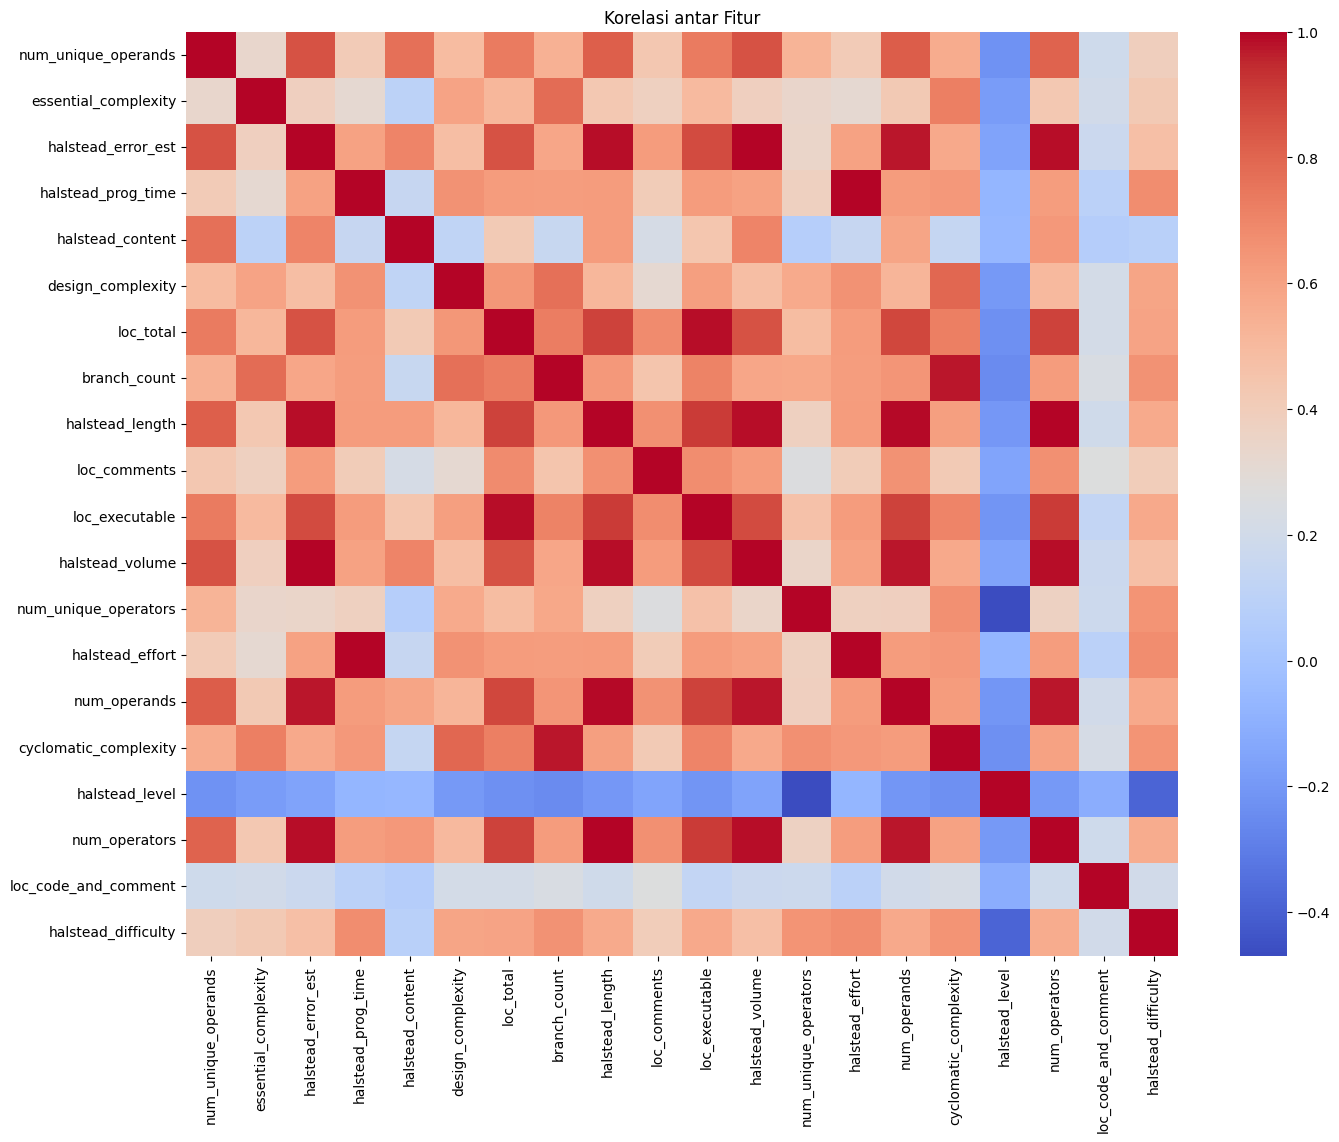

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 12))
sns.heatmap(merged.drop(columns=["defective"]).corr(), cmap="coolwarm", annot=False)
plt.title("Korelasi antar Fitur")
plt.show()

Feature Correlation to Defective Label

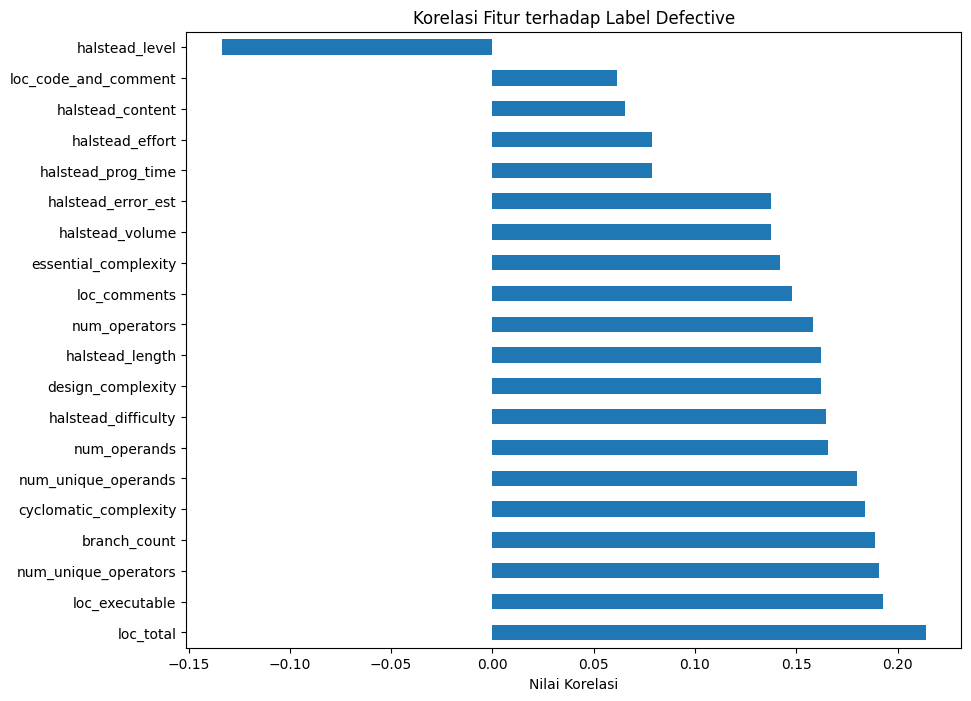

In [7]:
label_corr = merged.corr()["defective"].drop("defective").sort_values(ascending=False)
label_corr.plot(kind="barh", figsize=(10, 8), title="Korelasi Fitur terhadap Label Defective")
plt.xlabel("Nilai Korelasi")
plt.show()

##### Oversampling

Imports

In [8]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Separate Feature and Defective Label

In [9]:
X = merged.drop(columns=["defective"])
y = merged["defective"]

Oversampling with SMOTE

In [10]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


In [11]:
print("Sebelum Oversampling:")
print(y.value_counts())

print("\nSetelah Oversampling:")
print(pd.Series(y_resampled).value_counts())


Sebelum Oversampling:
defective
0    14223
1     2924
Name: count, dtype: int64

Setelah Oversampling:
defective
0    14223
1    14223
Name: count, dtype: int64


Visualization

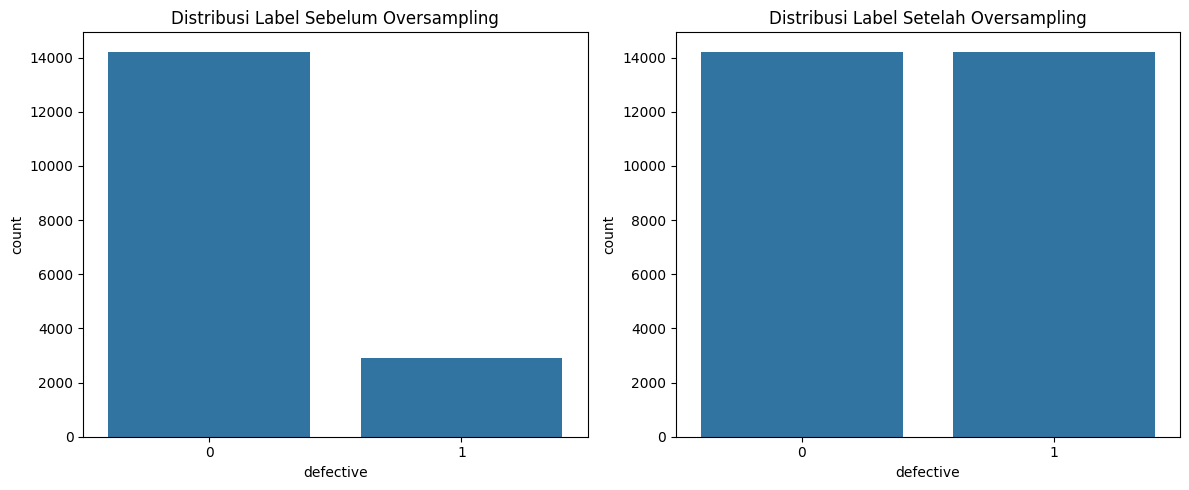

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(x=y, ax=ax[0])
ax[0].set_title("Distribusi Label Sebelum Oversampling")

sns.countplot(x=y_resampled, ax=ax[1])
ax[1].set_title("Distribusi Label Setelah Oversampling")

plt.tight_layout()
plt.show()


Store the Results

In [13]:
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled["defective"] = y_resampled


##### Normalization

Normalization with Standard Scaling

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_resampled.drop(columns=['defective']))

# Simpan label
y_scaled = df_resampled['defective']


In [15]:
# Konversi kembali ke DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=df_resampled.drop(columns=['defective']).columns)

# Tampilkan beberapa baris pertama
X_scaled_df.head()


,num_unique_operands,essential_complexity,halstead_error_est,halstead_prog_time,halstead_content,design_complexity,loc_total,branch_count,halstead_length,loc_comments,loc_executable,halstead_volume,num_unique_operators,halstead_effort,num_operands,cyclomatic_complexity,halstead_level,num_operators,loc_code_and_comment,halstead_difficulty
0,-0.545704,-0.334378,-0.301091,-0.136603,-0.288966,-0.388964,-0.416458,-0.396302,-0.379866,-0.006759,-0.355275,-0.302999,-0.748829,-0.136603,-0.394964,-0.372014,1.047053,-0.367712,-0.295058,-0.659209
1,-0.521814,-0.334378,-0.287172,-0.134515,-0.297078,-0.388964,-0.381048,-0.396302,-0.347081,-0.233288,-0.335739,-0.284693,-0.269501,-0.134515,-0.370412,-0.372014,-0.208531,-0.329849,-0.034387,-0.350996
2,0.744315,1.029895,0.241745,0.018441,0.103964,0.173382,0.468790,0.635905,0.308618,2.334043,0.572709,0.245198,1.647814,0.018441,0.317064,0.553284,-0.710764,0.301198,0.356619,0.837362
3,0.218752,-0.106999,-0.141024,-0.121653,0.088416,-0.201515,-0.133178,-0.267276,-0.160014,0.144260,-0.042691,-0.142023,0.401559,-0.121653,-0.173990,-0.256352,-0.208531,-0.150001,-0.295058,-0.302863
4,-0.187365,0.006690,-0.203659,-0.126607,-0.091149,0.079657,-0.133178,-0.009224,-0.229441,0.521809,-0.179447,-0.202645,0.305694,-0.126606,-0.277111,-0.025027,-0.292236,-0.197329,1.529636,-0.280617


##### PCA

PCA with Maximum Component

In [16]:
from sklearn.decomposition import PCA

# Jumlah maksimum komponen = jumlah fitur
pca = PCA(n_components=X_scaled.shape[1])
X_pca = pca.fit_transform(X_scaled)


Cumulative Explained Variance

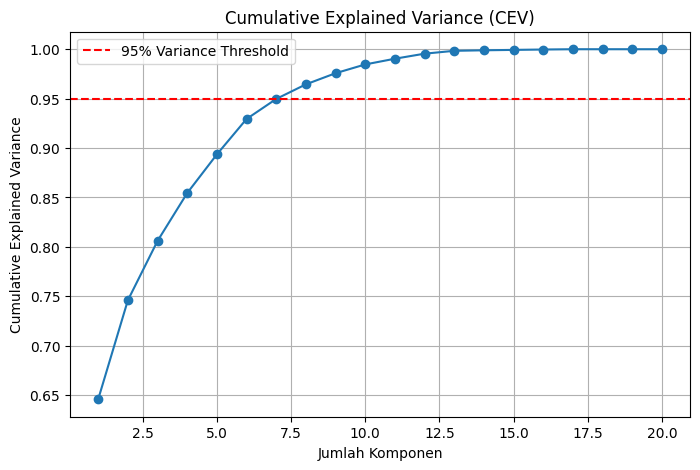

In [17]:
import numpy as np
import matplotlib.pyplot as plt

explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance Threshold')
plt.title('Cumulative Explained Variance (CEV)')
plt.xlabel('Jumlah Komponen')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.legend()
plt.show()


Variance Comparison

In [20]:
pca_variance_df = pd.DataFrame({
    'Komponen ke-': [f'PC{i+1}' for i in range(len(pca.explained_variance_ratio_))],
    'Explained Variance Ratio': pca.explained_variance_ratio_,
    'Cumulative Variance': explained_variance
})

pca_variance_df.head(19)  # Atau print semua


,Komponen ke-,Explained Variance Ratio,Cumulative Variance
0,PC1,6.458424e-01,0.645842
1,PC2,1.001465e-01,0.745989
2,PC3,6.002242e-02,0.806011
3,PC4,4.844555e-02,0.854457
4,PC5,3.911467e-02,0.893572
5,PC6,3.582747e-02,0.929399
6,PC7,2.027145e-02,0.949671
7,PC8,1.477489e-02,0.964445
8,PC9,1.127887e-02,0.975724
9,PC10,8.871174e-03,0.984595


Chosen N Component for (0.95 - 1.0)

In [19]:
thresholds = [0.95, 0.96, 0.97, 0.98, 0.99, 1.00]
epsilon = 1e-8

n_components_list = []

for threshold in thresholds:
    idx = np.argmax(explained_variance >= (threshold - epsilon))
    n_components = idx + 1
    n_components_list.append((threshold, n_components))

# Tampilkan hasilnya
for threshold, n in n_components_list:
    print(f"Untuk threshold {threshold*100:.0f}%, jumlah komponen: {n}")


Untuk threshold 95%, jumlah komponen: 8
Untuk threshold 96%, jumlah komponen: 8
Untuk threshold 97%, jumlah komponen: 9
Untuk threshold 98%, jumlah komponen: 10
Untuk threshold 99%, jumlah komponen: 11
Untuk threshold 100%, jumlah komponen: 18


10 Components for Classification Later

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# Split dulu
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X_scaled, y_scaled, test_size=0.2, stratify=y_scaled, random_state=42
)

# Fit PCA hanya di training
pca = PCA(n_components=19)
X_train_pca = pca.fit_transform(X_train_raw)

# Transform testing pakai PCA dari training
X_test_pca = pca.transform(X_test_raw)



PC1 and PC2 Visualization

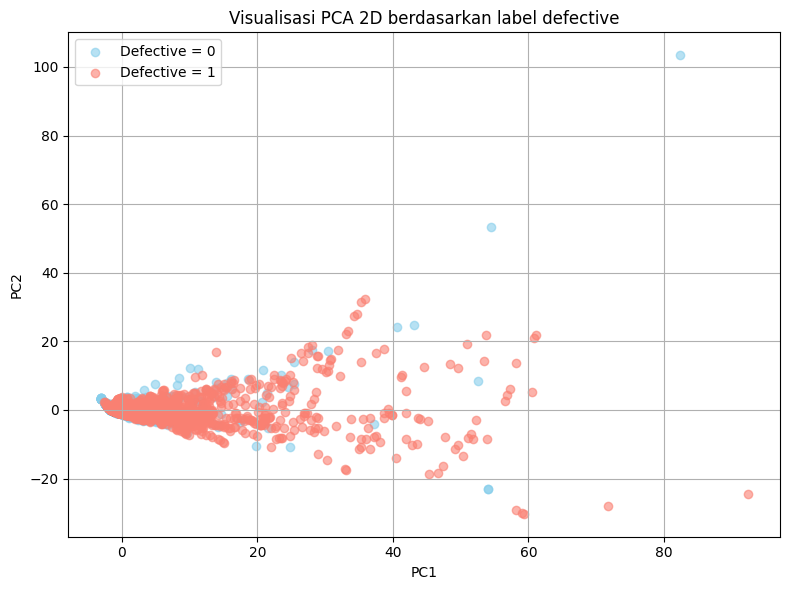

In [44]:
import matplotlib.pyplot as plt

# Ambil hanya dua komponen pertama dari PCA
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

# Buat DataFrame untuk visualisasi
pca_2d_df = pd.DataFrame(data=X_pca_2d, columns=["PC1", "PC2"])
pca_2d_df["defective"] = y_scaled.values

# Scatter plot
plt.figure(figsize=(8, 6))
colors = {0: 'skyblue', 1: 'salmon'}

for label in [0, 1]:
    subset = pca_2d_df[pca_2d_df["defective"] == label]
    plt.scatter(subset["PC1"], subset["PC2"], 
                label=f"Defective = {label}", 
                alpha=0.6, c=colors[label])

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Visualisasi PCA 2D berdasarkan label defective")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


##### t-SNE

t-SNE


▶️ Perplexity = 5


c:\Users\afilz\works\machine-learning\ta\venv310\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


889/889 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step
  Silhouette Score : 0.0675
  Davies-Bouldin Index : 2.7097

▶️ Perplexity = 10


c:\Users\afilz\works\machine-learning\ta\venv310\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


889/889 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step
  Silhouette Score : 0.0720
  Davies-Bouldin Index : 2.6851

▶️ Perplexity = 30


c:\Users\afilz\works\machine-learning\ta\venv310\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


889/889 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step
  Silhouette Score : 0.0769
  Davies-Bouldin Index : 2.7234

▶️ Perplexity = 50


c:\Users\afilz\works\machine-learning\ta\venv310\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


889/889 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step
  Silhouette Score : 0.0774
  Davies-Bouldin Index : 2.7278


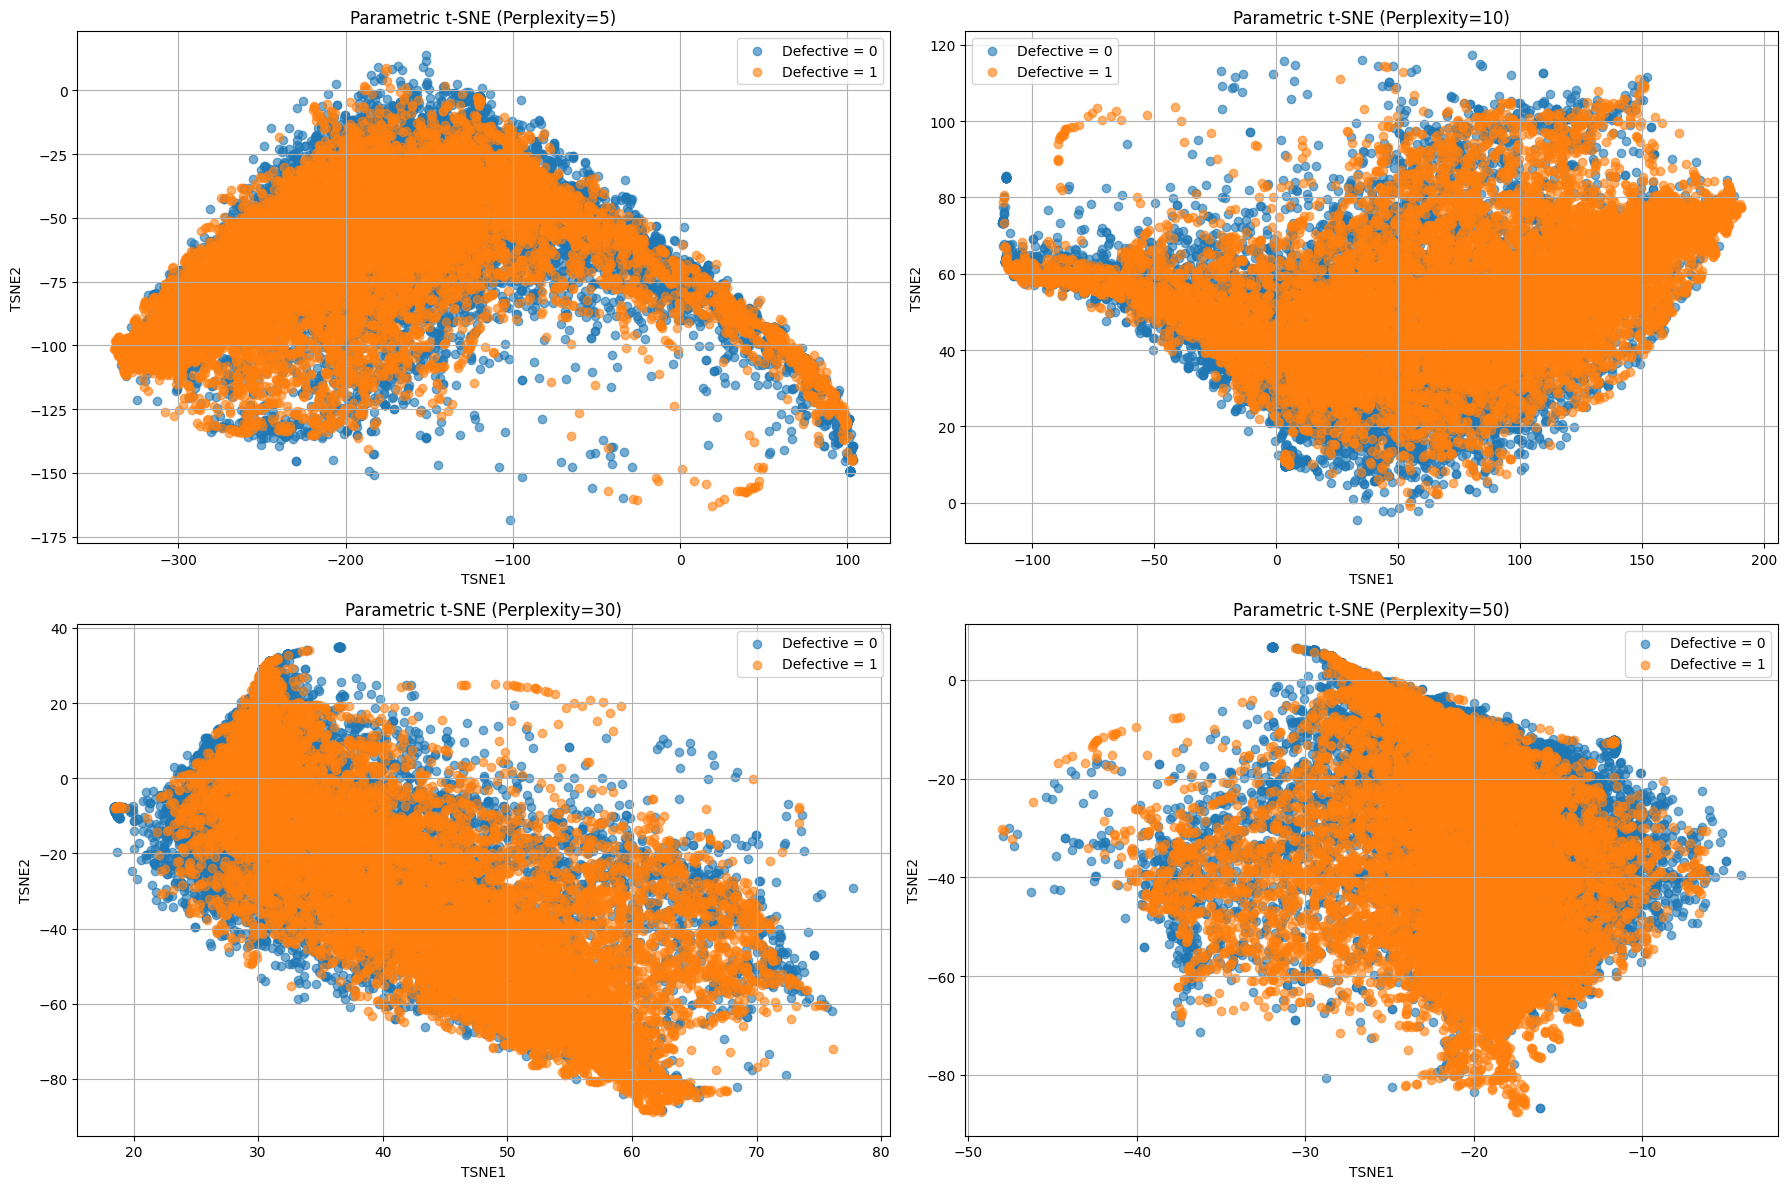

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import silhouette_score, davies_bouldin_score
from parametric_tSNE import Parametric_tSNE


# Daftar nilai perplexity yang ingin diuji
perplexities = [5, 10, 30, 50]

plt.figure(figsize=(18, 12))

# Simpan hasil coherence metrics
coherence_results = []

for i, perplexity in enumerate(perplexities, 1):
    print(f"\n▶️ Perplexity = {perplexity}")
    
    # 1️⃣ Fit parametric t-SNE ke seluruh data
    ptSNE = Parametric_tSNE(X_scaled.shape[1], 2, perplexity, seed=42)
    ptSNE.fit(X_scaled)
    
    # 2️⃣ Transform data ke ruang embedding
    X_tsne = ptSNE.transform(X_scaled)

    # 3️⃣ Buat DataFrame untuk visualisasi
    tsne_df = pd.DataFrame(X_tsne, columns=["TSNE1", "TSNE2"])
    tsne_df["defective"] = y_scaled.values

    # 4️⃣ Plot
    plt.subplot(2, 2, i)
    for label in [0, 1]:
        subset = tsne_df[tsne_df["defective"] == label]
        plt.scatter(subset["TSNE1"], subset["TSNE2"], alpha=0.6, label=f"Defective = {label}")
    
    plt.title(f"Parametric t-SNE (Perplexity={perplexity})")
    plt.xlabel("TSNE1")
    plt.ylabel("TSNE2")
    plt.legend()
    plt.grid(True)
    
    # 5️⃣ Coherence evaluation: silhouette dan Davies-Bouldin
    silhouette = silhouette_score(X_tsne, y_scaled)
    db_index = davies_bouldin_score(X_tsne, y_scaled)
    
    print(f"  Silhouette Score : {silhouette:.4f}")
    print(f"  Davies-Bouldin Index : {db_index:.4f}")
    
    coherence_results.append({
        "Perplexity": perplexity,
        "Silhouette": silhouette,
        "Davies-Bouldin": db_index
    })

plt.tight_layout()
plt.show()




##### PCA + Classification

Single Learning and Ensemble Learning Imports

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

from catboost import CatBoostClassifier
from xgboost import XGBClassifier

Model Train and Evaluation

In [18]:
models = { 
    "Logistic Regression": LogisticRegression(solver='saga', max_iter=1000, random_state=42),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42),
    "XGBoost": XGBClassifier(eval_metric="logloss", random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred)
    })

    print(f"\n==== {name} ====")
    print(classification_report(y_test, y_pred))

# Simpan hasil ke DataFrame (optional)
import pandas as pd
df_results = pd.DataFrame(results)
print("\n✅ Hasil evaluasi:")
print(df_results)


NameError: name 'X_train_pca' is not defined

In [68]:
# Tampilkan dalam bentuk DataFrame
df_results = pd.DataFrame(results)

# Urutkan berdasarkan F1-Score tertinggi
df_results_sorted = df_results.sort_values(by="F1-Score", ascending=False)

# Tampilkan hasil akhir
print("\n✅ Hasil Evaluasi Model:")
print(df_results_sorted.to_string(index=False))

df_results_sorted.to_clipboard(index=False, excel=True, sep='\t')




✅ Hasil Evaluasi Model:
              Model  Accuracy  Precision   Recall  F1-Score
      Random Forest  0.854130   0.832838 0.886116  0.858651
            XGBoost  0.802636   0.781189 0.840773  0.809887
           CatBoost  0.792091   0.775896 0.821441  0.798019
                KNN  0.775044   0.727802 0.878735  0.796178
  Gradient Boosting  0.724253   0.717599 0.739543  0.728406
           AdaBoost  0.690334   0.685255 0.704042  0.694521
                SVM  0.679262   0.710223 0.605624  0.653766
Logistic Regression  0.664499   0.700858 0.573989  0.631111


##### Parametric t-SNE + Classification 

Classification (3 Single + 5 Ensemble)

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

from parametric_tSNE import Parametric_tSNE
import pandas as pd

# 1️⃣ Split data
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X_scaled, y_scaled, test_size=0.2, stratify=y_scaled, random_state=42
)

# 2️⃣ Kombinasi output_dim yang diambil dari CEV PCA
output_dims = [8, 9, 10, 11, 19]
perplexity = 50

# 3️⃣ Model-model klasifikasi
models = { 
    "Logistic Regression": LogisticRegression(solver='saga', max_iter=1000, random_state=42),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42),
    "XGBoost": XGBClassifier(eval_metric="logloss", random_state=42)
}

results = []

# 4️⃣ Loop semua output_dim
for out_dim in output_dims:
    print(f"\n▶️ Parametric t-SNE: output_dim={out_dim}, perplexity={perplexity}")
    
    # Fit t-SNE hanya pada data train
    ptSNE = Parametric_tSNE(X_train_raw.shape[1], out_dim, perplexity, seed=42)
    ptSNE.fit(X_train_raw)
    
    # Transform data
    X_train_tsne = ptSNE.transform(X_train_raw)
    X_test_tsne = ptSNE.transform(X_test_raw)
    
    for name, model in models.items():
        model.fit(X_train_tsne, y_train)
        y_pred = model.predict(X_test_tsne)
        
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred)
        rec = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        
        results.append({
            "Output Dim": out_dim,
            "Perplexity": perplexity,
            "Model": name,
            "Accuracy": acc,
            "Precision": prec,
            "Recall": rec,
            "F1-Score": f1
        })

        print(f"  {name}: acc={acc:.4f}, f1={f1:.4f}")

# 5️⃣ Simpan hasil ke DataFrame
df_results = pd.DataFrame(results)
df_results_sorted = df_results.sort_values(by=["Output Dim", "F1-Score"], ascending=[True, False])

print("\n✅ Hasil Evaluasi Parametric t-SNE:")
print(df_results_sorted.to_string(index=False))

# Opsional: Simpan ke CSV
df_results_sorted.to_csv("parametric_tsne_results.csv", index=False)



▶️ Parametric t-SNE: output_dim=8, perplexity=50


c:\Users\afilz\works\machine-learning\ta\venv310\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


712/712 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
  Logistic Regression: acc=0.6536, f1=0.6531
  SVM: acc=0.6626, f1=0.6544
  KNN: acc=0.7439, f1=0.7608
  Random Forest: acc=0.7845, f1=0.7909
  AdaBoost: acc=0.6476, f1=0.6215
  Gradient Boosting: acc=0.6736, f1=0.6682
  CatBoost: acc=0.7179, f1=0.7214
  XGBoost: acc=0.7374, f1=0.7454

▶️ Parametric t-SNE: output_dim=9, perplexity=50


c:\Users\afilz\works\machine-learning\ta\venv310\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


712/712 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
  Logistic Regression: acc=0.6568, f1=0.6509
  SVM: acc=0.6617, f1=0.6550
  KNN: acc=0.7422, f1=0.7588
  Random Forest: acc=0.7882, f1=0.7940
  AdaBoost: acc=0.6591, f1=0.6488
  Gradient Boosting: acc=0.6703, f1=0.6686
  CatBoost: acc=0.7195, f1=0.7242
  XGBoost: acc=0.7308, f1=0.7386

▶️ Parametric t-SNE: output_dim=10, perplexity=50


c:\Users\afilz\works\machine-learning\ta\venv310\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


712/712 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
  Logistic Regression: acc=0.6559, f1=0.6522
  SVM: acc=0.6615, f1=0.6551
  KNN: acc=0.7395, f1=0.7566
  Random Forest: acc=0.7817, f1=0.7883
  AdaBoost: acc=0.6378, f1=0.5921
  Gradient Boosting: acc=0.6745, f1=0.6629
  CatBoost: acc=0.7237, f1=0.7247
  XGBoost: acc=0.7302, f1=0.7358

▶️ Parametric t-SNE: output_dim=11, perplexity=50


c:\Users\afilz\works\machine-learning\ta\venv310\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


712/712 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
  Logistic Regression: acc=0.6571, f1=0.6544
  SVM: acc=0.6615, f1=0.6551
  KNN: acc=0.7409, f1=0.7592
  Random Forest: acc=0.7868, f1=0.7930
  AdaBoost: acc=0.6531, f1=0.6516
  Gradient Boosting: acc=0.6682, f1=0.6637
  CatBoost: acc=0.7190, f1=0.7205
  XGBoost: acc=0.7336, f1=0.7399

▶️ Parametric t-SNE: output_dim=19, perplexity=50


c:\Users\afilz\works\machine-learning\ta\venv310\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


712/712 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
  Logistic Regression: acc=0.6580, f1=0.6552
  SVM: acc=0.6619, f1=0.6559
  KNN: acc=0.7443, f1=0.7610
  Random Forest: acc=0.7851, f1=0.7922
  AdaBoost: acc=0.6550, f1=0.6564
  Gradient Boosting: acc=0.6650, f1=0.6589
  CatBoost: acc=0.7297, f1=0.7367
  XGBoost: acc=0.7336, f1=0.7417

✅ Hasil Evaluasi Parametric t-SNE:
 Output Dim  Perplexity               Model  Accuracy  Precision   Recall  F1-Score
          8          50       Random Forest  0.784534   0.768313 0.814763  0.790856
          8          50                 KNN  0.743937   0.713802 0.814411  0.760795
          8          50             XGBoost  0.737434   0.723454 0.768717  0.745399
          8          50            CatBoost  0.717926   0.712620 0.730404  0.721403
          8          50   Gradient Boosting  0.673638   0.679506 0.657293  0.668215
          8          50                 SVM  0.662566   0.670601 0.639016  0.654428
        

Copy to Clipboard

In [25]:
out_dim = 19
df_filtered = df_results_sorted[df_results_sorted["Output Dim"] == out_dim]

# Drop kolom yang tidak perlu disalin
df_to_copy = df_filtered.drop(columns=["Output Dim", "Perplexity"])

# Tampilkan ke terminal
print(df_to_copy.to_string(index=False))

# Salin ke clipboard tanpa kolom tambahan
df_to_copy.to_clipboard(index=False, sep='\t')


              Model  Accuracy  Precision   Recall  F1-Score
      Random Forest  0.785062   0.766776 0.819332  0.792184
                KNN  0.744288   0.714374 0.814060  0.760966
            XGBoost  0.733568   0.719669 0.765202  0.741738
           CatBoost  0.729701   0.718051 0.756415  0.736734
  Gradient Boosting  0.665026   0.671163 0.647100  0.658912
           AdaBoost  0.655009   0.653766 0.659051  0.656398
                SVM  0.661863   0.667637 0.644640  0.655937
Logistic Regression  0.657996   0.660593 0.649912  0.655209


##### Hyperparameter Tuning After PCA

Parameter Grids

In [26]:
from sklearn.model_selection import GridSearchCV

# Parameter grid untuk setiap model
param_grids = {
    "Logistic Regression": {
        "C": [0.01, 0.1, 1, 10],
        "penalty": ["l1", "l2", None]
    },
    "SVM": {
        "C": [0.1, 1, 10],
        "kernel": ["linear", "rbf"]
    },
    "KNN": {
        "n_neighbors": [3, 5, 7, 9]
    },
    "Random Forest": {
        "n_estimators": [50, 100, 200],
        "max_depth": [None, 5, 10]
    },
    "AdaBoost": {
        "n_estimators": [50, 100, 200],
        "learning_rate": [0.5, 1.0]
    },
    "Gradient Boosting": {
        "n_estimators": [50, 100],
        "learning_rate": [0.05, 0.1],
        "max_depth": [3, 5]
    },
    "CatBoost": {
        "iterations": [100, 200],
        "learning_rate": [0.03, 0.1],
        "depth": [3, 5, 7]
    },
    "XGBoost": {
        "n_estimators": [100, 200],
        "learning_rate": [0.05, 0.1],
        "max_depth": [3, 5, 7]
    }
}



Lakukan GridsearchCV

In [70]:
from sklearn.model_selection import StratifiedKFold

results_pca_tuned = []

for name, model in models.items():
    print(f"Tuning {name}...")
    grid = GridSearchCV(model, param_grids[name], cv=StratifiedKFold(n_splits=5), scoring='f1', n_jobs=-1)
    grid.fit(X_train_pca, y_train)

    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test_pca)

    results_pca_tuned.append({
        "Model": name,
        "Best Params": grid.best_params_,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred)
    })

    print(f"\n==== {name} (Tuned) ====")
    print("Best Params:", grid.best_params_)
    print(classification_report(y_test, y_pred))


Tuning Logistic Regression...


c:\Users\afilz\works\machine-learning\ta\venv310\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



==== Logistic Regression (Tuned) ====
Best Params: {'C': 10, 'penalty': 'l2'}
              precision    recall  f1-score   support

           0       0.64      0.75      0.69      2845
           1       0.70      0.57      0.63      2845

    accuracy                           0.66      5690
   macro avg       0.67      0.66      0.66      5690
weighted avg       0.67      0.66      0.66      5690

Tuning SVM...

==== SVM (Tuned) ====
Best Params: {'C': 10, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.68      0.75      0.71      2845
           1       0.72      0.64      0.68      2845

    accuracy                           0.70      5690
   macro avg       0.70      0.70      0.70      5690
weighted avg       0.70      0.70      0.70      5690

Tuning KNN...

==== KNN (Tuned) ====
Best Params: {'n_neighbors': 3}
              precision    recall  f1-score   support

           0       0.87      0.69      0.77      2845
           1

Copy to Clipboard

In [71]:
# Tampilkan dalam bentuk DataFrame
df_results_pca_tuned = pd.DataFrame(results_pca_tuned)

# Urutkan berdasarkan F1-Score tertinggi
df_results_pca_tuned_sorted = df_results_pca_tuned.sort_values(by="F1-Score", ascending=False)

# Tampilkan hasil akhir
print("\n✅ Hasil Evaluasi Model:")
print(df_results_pca_tuned_sorted.to_string(index=False))

df_results_pca_tuned_sorted.to_clipboard(index=False, excel=True, sep='\t')



✅ Hasil Evaluasi Model:
              Model                                                 Best Params  Accuracy  Precision   Recall  F1-Score
      Random Forest                    {'max_depth': None, 'n_estimators': 200}  0.857645   0.836809 0.888576  0.861916
            XGBoost {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}  0.818278   0.794472 0.858699  0.825338
                KNN                                          {'n_neighbors': 3}  0.794025   0.743098 0.898770  0.813554
           CatBoost       {'depth': 7, 'iterations': 200, 'learning_rate': 0.1}  0.779438   0.768763 0.799297  0.783733
  Gradient Boosting {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}  0.759930   0.748571 0.782777  0.765292
           AdaBoost                 {'learning_rate': 1.0, 'n_estimators': 200}  0.706678   0.709850 0.699121  0.704445
                SVM                                  {'C': 10, 'kernel': 'rbf'}  0.697540   0.721784 0.642882  0.680052
Logistic Regres

##### Hyperparameter Tuning After t-SNE

In [27]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score
import pandas as pd

# 1️⃣ Konfigurasi kombinasi
output_dims = [8, 9, 10, 11, 19]
perplexity = 50

# 3️⃣ Simpan hasil tuning semua output_dim
results_tsne_tuned = []

for out_dim in output_dims:
    print(f"\n🎯 Parametric t-SNE output_dim={out_dim}, perplexity={perplexity}")
    
    # Buat dan fit Parametric t-SNE
    ptSNE = Parametric_tSNE(num_inputs=X_scaled.shape[1], num_outputs=out_dim, perplexities=perplexity, seed=42)
    ptSNE.fit(X_train_raw)

    X_train_tsne = ptSNE.transform(X_train_raw)
    X_test_tsne = ptSNE.transform(X_test_raw)

    for name, model in models.items():
        if name == "SVM":
            print("\n▶️ Skip GridSearch for SVM. Use best param from PCA!")
            best_params_svm_pca = {
                "C": 10,
                "kernel": "rbf"
            }
            svm_model = SVC(**best_params_svm_pca)
            svm_model.fit(X_train_tsne, y_train)
            y_pred = svm_model.predict(X_test_tsne)

            acc = accuracy_score(y_test, y_pred)
            prec = precision_score(y_test, y_pred)
            rec = recall_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)

            results_tsne_tuned.append({
                "Output Dim": out_dim,
                "Perplexity": perplexity,
                "Model": name,
                "Best Params": best_params_svm_pca,
                "Accuracy": acc,
                "Precision": prec,
                "Recall": rec,
                "F1-Score": f1
            })

            print(f"\n==== {name} (Parametric t-SNE + Best Param PCA) ====")
            print("Best Params:", best_params_svm_pca)
            print(classification_report(y_test, y_pred))
            continue

        print(f"\nTuning {name} (Parametric t-SNE)...")
        grid = GridSearchCV(
            model,
            param_grids[name],
            cv=StratifiedKFold(n_splits=5),
            scoring='f1',
            n_jobs=-1
        )
        grid.fit(X_train_tsne, y_train)

        best_model = grid.best_estimator_
        y_pred = best_model.predict(X_test_tsne)

        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred)
        rec = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        results_tsne_tuned.append({
            "Output Dim": out_dim,
            "Perplexity": perplexity,
            "Model": name,
            "Best Params": grid.best_params_,
            "Accuracy": acc,
            "Precision": prec,
            "Recall": rec,
            "F1-Score": f1
        })

        print(f"\n==== {name} (Parametric t-SNE + Tuned) ====")
        print("Best Params:", grid.best_params_)
        print(classification_report(y_test, y_pred))

# 4️⃣ Simpan hasil tuning ke DataFrame
df_results_tsne_tuned = pd.DataFrame(results_tsne_tuned)
df_results_tsne_tuned_sorted = df_results_tsne_tuned.sort_values(by=["Output Dim", "F1-Score"], ascending=[True, False])

print("\n✅ Hasil Hyperparameter Tuning Parametric t-SNE:")
print(df_results_tsne_tuned_sorted.to_string(index=False))

# 5️⃣ Simpan ke file CSV (opsional)
# df_results_tsne_tuned_sorted.to_csv("parametric_tsne_tuned_results.csv", index=False)



🎯 Parametric t-SNE output_dim=8, perplexity=50


c:\Users\afilz\works\machine-learning\ta\venv310\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


712/712 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

Tuning Logistic Regression (Parametric t-SNE)...


c:\Users\afilz\works\machine-learning\ta\venv310\lib\site-packages\sklearn\linear_model\_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(



==== Logistic Regression (Parametric t-SNE + Tuned) ====
Best Params: {'C': 0.01, 'penalty': None}
              precision    recall  f1-score   support

           0       0.65      0.66      0.66      2845
           1       0.66      0.65      0.65      2845

    accuracy                           0.65      5690
   macro avg       0.65      0.65      0.65      5690
weighted avg       0.65      0.65      0.65      5690


▶️ Skip GridSearch for SVM. Use best param from PCA!

==== SVM (Parametric t-SNE + Best Param PCA) ====
Best Params: {'C': 10, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.66      0.68      0.67      2845
           1       0.67      0.65      0.66      2845

    accuracy                           0.67      5690
   macro avg       0.67      0.67      0.67      5690
weighted avg       0.67      0.67      0.67      5690


Tuning KNN (Parametric t-SNE)...

==== KNN (Parametric t-SNE + Tuned) ====
Best Params: {'n_neighbor

c:\Users\afilz\works\machine-learning\ta\venv310\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


712/712 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Tuning Logistic Regression (Parametric t-SNE)...


c:\Users\afilz\works\machine-learning\ta\venv310\lib\site-packages\sklearn\linear_model\_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(



==== Logistic Regression (Parametric t-SNE + Tuned) ====
Best Params: {'C': 0.01, 'penalty': None}
              precision    recall  f1-score   support

           0       0.65      0.67      0.66      2845
           1       0.66      0.64      0.65      2845

    accuracy                           0.65      5690
   macro avg       0.65      0.65      0.65      5690
weighted avg       0.65      0.65      0.65      5690


▶️ Skip GridSearch for SVM. Use best param from PCA!

==== SVM (Parametric t-SNE + Best Param PCA) ====
Best Params: {'C': 10, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.66      0.69      0.67      2845
           1       0.67      0.65      0.66      2845

    accuracy                           0.67      5690
   macro avg       0.67      0.67      0.67      5690
weighted avg       0.67      0.67      0.67      5690


Tuning KNN (Parametric t-SNE)...

==== KNN (Parametric t-SNE + Tuned) ====
Best Params: {'n_neighbor

c:\Users\afilz\works\machine-learning\ta\venv310\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


712/712 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Tuning Logistic Regression (Parametric t-SNE)...

==== Logistic Regression (Parametric t-SNE + Tuned) ====
Best Params: {'C': 0.1, 'penalty': 'l1'}
              precision    recall  f1-score   support

           0       0.65      0.67      0.66      2845
           1       0.66      0.64      0.65      2845

    accuracy                           0.66      5690
   macro avg       0.66      0.66      0.66      5690
weighted avg       0.66      0.66      0.66      5690


▶️ Skip GridSearch for SVM. Use best param from PCA!

==== SVM (Parametric t-SNE + Best Param PCA) ====
Best Params: {'C': 10, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.66      0.68      0.67      2845
           1       0.67      0.65      0.66      2845

    accuracy                           0.67      5690
   macro avg       0.67      0.67      0.67      5690
weighted avg       0.67  

c:\Users\afilz\works\machine-learning\ta\venv310\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


712/712 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Tuning Logistic Regression (Parametric t-SNE)...


c:\Users\afilz\works\machine-learning\ta\venv310\lib\site-packages\sklearn\linear_model\_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(



==== Logistic Regression (Parametric t-SNE + Tuned) ====
Best Params: {'C': 0.01, 'penalty': None}
              precision    recall  f1-score   support

           0       0.65      0.68      0.66      2845
           1       0.66      0.63      0.65      2845

    accuracy                           0.65      5690
   macro avg       0.66      0.65      0.65      5690
weighted avg       0.66      0.65      0.65      5690


▶️ Skip GridSearch for SVM. Use best param from PCA!

==== SVM (Parametric t-SNE + Best Param PCA) ====
Best Params: {'C': 10, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.66      0.68      0.67      2845
           1       0.67      0.65      0.66      2845

    accuracy                           0.67      5690
   macro avg       0.67      0.67      0.67      5690
weighted avg       0.67      0.67      0.67      5690


Tuning KNN (Parametric t-SNE)...

==== KNN (Parametric t-SNE + Tuned) ====
Best Params: {'n_neighbor

c:\Users\afilz\works\machine-learning\ta\venv310\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


712/712 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Tuning Logistic Regression (Parametric t-SNE)...


c:\Users\afilz\works\machine-learning\ta\venv310\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



==== Logistic Regression (Parametric t-SNE + Tuned) ====
Best Params: {'C': 1, 'penalty': 'l1'}
              precision    recall  f1-score   support

           0       0.65      0.70      0.67      2845
           1       0.67      0.62      0.65      2845

    accuracy                           0.66      5690
   macro avg       0.66      0.66      0.66      5690
weighted avg       0.66      0.66      0.66      5690


▶️ Skip GridSearch for SVM. Use best param from PCA!

==== SVM (Parametric t-SNE + Best Param PCA) ====
Best Params: {'C': 10, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.66      0.69      0.67      2845
           1       0.68      0.65      0.66      2845

    accuracy                           0.67      5690
   macro avg       0.67      0.67      0.67      5690
weighted avg       0.67      0.67      0.67      5690


Tuning KNN (Parametric t-SNE)...

==== KNN (Parametric t-SNE + Tuned) ====
Best Params: {'n_neighbors':

Copy to clipboard

In [33]:
out_dim = 19
df_filtered = df_results_tsne_tuned_sorted[df_results_tsne_tuned_sorted["Output Dim"] == out_dim]

# Drop kolom yang tidak perlu disalin
df_to_copy = df_filtered.drop(columns=["Output Dim", "Perplexity"])

# Tampilkan ke terminal
print(df_to_copy.to_string(index=False))

# Salin ke clipboard tanpa kolom tambahan
df_to_copy.to_clipboard(index=False, sep='\t')

              Model                                                 Best Params  Accuracy  Precision   Recall  F1-Score
      Random Forest                    {'max_depth': None, 'n_estimators': 200}  0.792443   0.770833 0.832337  0.800406
                KNN                                          {'n_neighbors': 3}  0.754833   0.724737 0.821793  0.770219
            XGBoost {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}  0.751142   0.736355 0.782425  0.758691
           CatBoost       {'depth': 7, 'iterations': 200, 'learning_rate': 0.1}  0.713005   0.711888 0.715641  0.713760
  Gradient Boosting {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}  0.695255   0.694163 0.698067  0.696109
                SVM                                  {'C': 10, 'kernel': 'rbf'}  0.668893   0.675429 0.650264  0.662607
           AdaBoost                 {'learning_rate': 0.5, 'n_estimators': 200}  0.650264   0.646154 0.664323  0.655113
Logistic Regression                     

Export to CSV

In [28]:
# (opsional) simpan ke file CSV
df_results_tsne_tuned_sorted.to_csv("parametric_tsne_tuned_results.csv", index=False)

##### Cross Validation for Random Forest after PCA (best model)

In [16]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import pandas as pd

# Asumsi: X_scaled, y_scaled sudah ada
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Simpan hasil tiap fold
cv_results = []

for fold, (train_idx, val_idx) in enumerate(kfold.split(X_scaled, y_scaled), 1):
    print(f"\n=== Fold {fold} ===")
    
    # Split data
    X_train, X_val = X_scaled[train_idx], X_scaled[val_idx]
    y_train, y_val = y_scaled[train_idx], y_scaled[val_idx]
    
    # PCA fit hanya di train
    pca = PCA(n_components=19)
    X_train_pca = pca.fit_transform(X_train)
    X_val_pca = pca.transform(X_val)
    
    # Random Forest
    rf = RandomForestClassifier(n_estimators=200, max_depth=None, random_state=42)
    rf.fit(X_train_pca, y_train)
    y_pred = rf.predict(X_val_pca)
    
    # Evaluasi
    acc = accuracy_score(y_val, y_pred)
    prec = precision_score(y_val, y_pred)
    rec = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    
    cv_results.append({
        "Fold": fold,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1
    })
    
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-Score: {f1:.4f}")

# Konversi ke DataFrame
df_cv_results = pd.DataFrame(cv_results)

# Rata-rata & std dev
summary = {
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score"],
    "Mean": [
        np.mean(df_cv_results["Accuracy"]),
        np.mean(df_cv_results["Precision"]),
        np.mean(df_cv_results["Recall"]),
        np.mean(df_cv_results["F1-Score"])
    ],
    "StdDev": [
        np.std(df_cv_results["Accuracy"]),
        np.std(df_cv_results["Precision"]),
        np.std(df_cv_results["Recall"]),
        np.std(df_cv_results["F1-Score"])
    ]
}
df_summary = pd.DataFrame(summary)

# Simpan ke CSV
df_cv_results.to_csv("pca_rf_cv_folds.csv", index=False)
df_summary.to_csv("pca_rf_cv_summary.csv", index=False)

print("\n✅ Hasil cross-validation per fold disimpan di 'pca_rf_cv_folds.csv'")
print("✅ Ringkasan (mean ± std) disimpan di 'pca_rf_cv_summary.csv'")



=== Fold 1 ===
Accuracy: 0.8617
Precision: 0.8455
Recall: 0.8851
F1-Score: 0.8648

=== Fold 2 ===
Accuracy: 0.8601
Precision: 0.8360
Recall: 0.8959
F1-Score: 0.8649

=== Fold 3 ===
Accuracy: 0.8632
Precision: 0.8436
Recall: 0.8917
F1-Score: 0.8670

=== Fold 4 ===
Accuracy: 0.8615
Precision: 0.8411
Recall: 0.8914
F1-Score: 0.8655

=== Fold 5 ===
Accuracy: 0.8666
Precision: 0.8507
Recall: 0.8893
F1-Score: 0.8696

✅ Hasil cross-validation per fold disimpan di 'pca_rf_cv_folds.csv'
✅ Ringkasan (mean ± std) disimpan di 'pca_rf_cv_summary.csv'


In [17]:
# Tampilkan dan salin hasil ke clipboard
print("\n📋 Hasil Evaluasi Per Fold:")
print(df_cv_results.to_string(index=False))
df_cv_results.to_clipboard(index=False, sep='\t')




📋 Hasil Evaluasi Per Fold:
 Fold  Accuracy  Precision   Recall  F1-Score
    1  0.861687   0.845534 0.885062  0.864846
    2  0.860081   0.835958 0.895921  0.864902
    3  0.863245   0.843646 0.891702  0.867009
    4  0.861487   0.841128 0.891388  0.865529
    5  0.866585   0.850706 0.889279  0.869565


In [18]:
print("\n📋 Ringkasan (mean ± std):")
print(df_summary.to_string(index=False))
df_summary.to_clipboard(index=False, sep='\t')


📋 Ringkasan (mean ± std):
   Metric     Mean   StdDev
 Accuracy 0.862617 0.002223
Precision 0.843394 0.004869
   Recall 0.890670 0.003537
 F1-Score 0.866370 0.001778
